$\textbf{Student:}$ Carlos Daniel Fontes da Silva\
$\textbf{E-mail:}$ carlos.fontes@ee.ufcg.edu.br

# Slab dielectric waveguides

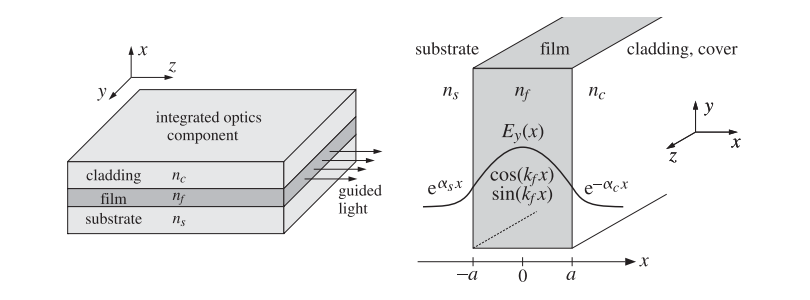

In [258]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, pi, mu_0, epsilon_0
from scipy.signal import find_peaks

## Field components functions

In [249]:
def TE(β, ω, kf, αc, αs, Φ, x1, x2, x3):
    # Substrate
    Ex_substrate = np.zeros(len(x1))
    Ey_substrate = (1j*ω*μ/αs) * np.sin(kf*a - Φ) * np.exp(αs * (x1 + a))
    Ez_substrate = np.zeros(len(x1))
    
    Hx_substrate = (-1j*β/αs) * np.sin(kf*a - Φ) * np.exp(αs * (x1 + a))
    Hy_substrate = np.zeros(len(x1))
    Hz_substrate = -np.sin(kf*a - Φ) * np.exp(αs * (x1 + a))
    
    E_substrate = np.array([Ex_substrate, Ey_substrate, Ez_substrate], complex)
    H_substrate = np.array([Hx_substrate, Hy_substrate, Hz_substrate], complex)
    
    # Core    
    Ex_core = np.zeros(len(x2))
    Ey_core = (1j*ω*μ/kf) * np.cos(kf*x2 + Φ)
    Ez_core = np.zeros(len(x2))
    
    Hx_core = (-1j*β/kf) * np.cos(kf*x2 + Φ)
    Hy_core = np.zeros(len(x2))
    Hz_core = np.sin(kf*x2 + Φ)
    
    E_core = np.array([Ex_core, Ey_core, Ez_core], complex)
    H_core = np.array([Hx_core, Hy_core, Hz_core], complex)
    
    # Cladding
    Ex_cladding = np.zeros(len(x3))
    Ey_cladding = (1j*ω*μ/αc) * np.sin(kf*a + Φ) * np.exp( - αc * (x3 - a))
    Ez_cladding = np.zeros(len(x3))
    
    Hx_cladding = (-1j*β/αc) * np.sin(kf*a + Φ) * np.exp( - αc * (x3 - a))
    Hy_cladding = np.zeros(len(x3))
    Hz_cladding = np.sin(kf*a + Φ) * np.exp(- αc * (x3 - a))
    
    E_cladding = np.array([Ex_cladding, Ey_cladding, Ez_cladding], complex)
    H_cladding = np.array([Hx_cladding, Hy_cladding, Hz_cladding], complex)

    return E_core, E_cladding, E_substrate, H_core, H_cladding, H_substrate

In [250]:
def TM(β, ω, kf, αc, αs, Φ, x1, x2, x3):
    # Substrate
    Ex_substrate = (-1j*β/αs) * np.sin(kf*a - Φ) * np.exp(αs * (x1 + a))
    Ey_substrate = np.zeros(len(x1))
    Ez_substrate = -np.sin(kf*a - Φ) * np.exp(αs * (x1 + a))
    
    Hx_substrate = np.zeros(len(x1))
    Hy_substrate = (-1j*ω) * (ns**2/αs) * np.sin(kf*a - Φ) * np.exp(αs * (x1 + a))
    Hz_substrate = np.zeros(len(x1))
    
    E_substrate = np.array([Ex_substrate, Ey_substrate, Ez_substrate], complex)
    H_substrate = np.array([Hx_substrate, Hy_substrate, Hz_substrate], complex)
    
    # Core    
    Ex_core = (-1j*β/kf) * np.cos(kf*x2 + Φ)
    Ey_core = np.zeros(len(x2))
    Ez_core = np.sin(kf*x2 + Φ)
    
    Hx_core = np.zeros(len(x2))
    Hy_core = (-1j*ω) * (nf**2/kf) * np.cos(kf*x2 + Φ)
    Hz_core = np.zeros(len(x2))
    
    E_core = np.array([Ex_core, Ey_core, Ez_core], complex)
    H_core = np.array([Hx_core, Hy_core, Hz_core], complex)
    
    # Cladding
    Ex_cladding = (-1j*β/αc) * np.sin(kf*a + Φ) * np.exp( - αc * (x3 - a))
    Ey_cladding = np.zeros(len(x3))
    Ez_cladding = np.sin(kf*a + Φ) * np.exp(- αc * (x3 - a))
    
    Hx_cladding = np.zeros(len(x3))
    Hy_cladding = (-1j*ω) * (nc**2/αc) * np.sin(kf*a + Φ) * np.exp( - αc * (x3 - a))
    Hz_cladding = np.zeros(len(x3))
    
    E_cladding = np.array([Ex_cladding, Ey_cladding, Ez_cladding], complex)
    H_cladding = np.array([Hx_cladding, Hy_cladding, Hz_cladding], complex)
    
    return E_core, E_cladding, E_substrate, H_core, H_cladding, H_substrate

In [251]:
def propagation(a, k0, neff):
    fig, axs = plt.subplots(1, 2, figsize = (14, 6))
    
    kf = k0*np.sqrt(nf**2 - neff**2)
    αs = k0*np.sqrt(neff**2 - ns**2)
    αc = k0*np.sqrt(neff**2 - nc**2)
    
    u = a*kf
    v = a*αs
    w = a*αc
    
    modes = []
    
    # Characteristic equation for TE modes
    LHS = u*(v + w) / (u**2 - v*w)    
    RHS = np.tan(2*u)
    
    LHS[(LHS > 10)]  = np.nan
    LHS[(LHS < -10)] = np.nan
    RHS[(RHS > 10)]  = np.nan
    RHS[(RHS < -10)] = np.nan
    
    peak, _   = find_peaks( - abs(LHS - RHS), height = -1)

    for i in range(len(peak)):
        modes.append(["TE"+str(i), np.flip(neff[peak])[i]])
        
    axs[0].plot(neff, LHS, "r", label = "LHS")
    axs[0].plot(neff, RHS, "k", label = "RHS")
    axs[0].set_ylim(-5,5)
    axs[0].set_xlim(min(neff),max(neff))
    axs[0].set_xlabel(r"$n_{eff}$", fontsize = 14, fontstyle = 'italic')
    axs[0].tick_params(axis = 'both', labelsize = 12)
    axs[0].legend(fontsize = 12)
    axs[0].grid()
    
    # Characteristic equation for TM modes
    LHS = u*(ps*v + pc*w) / (u**2 - pc*ps*v*w)    
    RHS = np.tan(2*u)
    
    LHS[(LHS > 10)]  = np.nan
    LHS[(LHS < -10)] = np.nan
    RHS[(RHS > 10)]  = np.nan
    RHS[(RHS < -10)] = np.nan
    
    peak, _   = find_peaks( - abs(LHS - RHS), height = -1)

    for i in range(len(peak)):
        modes.append(["TM"+str(i), np.flip(neff[peak])[i]])
        
    axs[1].plot(neff, LHS, "b", label = "LHS")
    axs[1].plot(neff, RHS, "k", label = "RHS")
    axs[1].set_ylim(-5,5)
    axs[1].set_xlim(min(neff),max(neff))
    axs[1].set_xlabel(r"$n_{eff}$", fontsize = 14, fontstyle = 'italic')
    axs[1].tick_params(axis = 'both', labelsize = 12)
    axs[1].legend(fontsize = 12)
    axs[1].grid()
    
    return modes

## 1 - Waveguide parameters

In [252]:
a = 0.35e-6    # Half of core's width  

nc = 1.45      # Substrate index
nf = 3.50      # Core index
ns = 1.45      # Cladding index

pc = (nf/nc)**2
ps = (nf/ns)**2
δ = (ns**2 - nc**2) / (nf**2 - ns**2)

μ = 1 * mu_0

In [253]:
λ0 = 1.55e-6   # Wavelength operation
k0 = 2*pi/λ0   # Wave number in vacuum
ω  = k0*c      # Frequency operation

neff = np.linspace(1.0001*ns, 0.9999*nf, 500)

## 2 - Propagated modes by characteristic equation

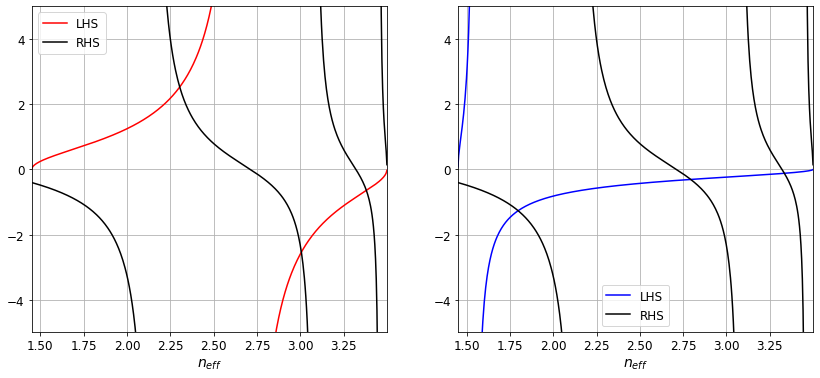

In [254]:
modes = propagation(a, k0, neff)

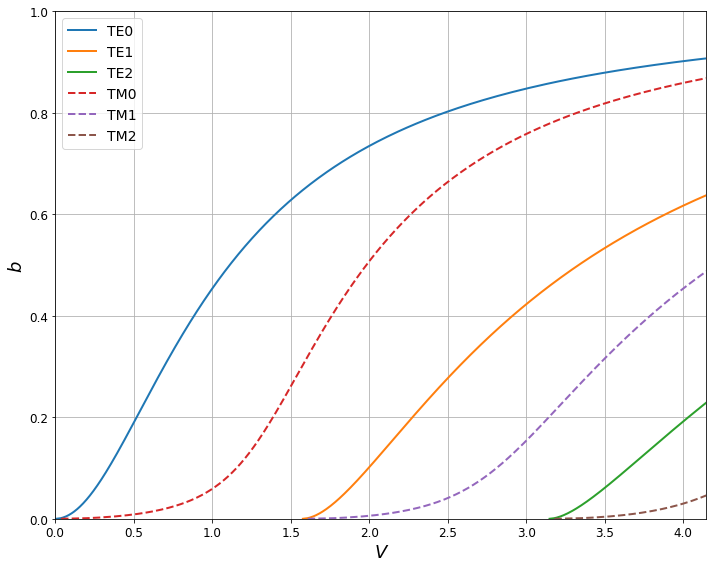

In [255]:
plt.figure(figsize = (10, 8))

b = (neff**2 - ns**2 ) / (nf**2 - ns**2)    # Normalized propagation constant

for i in range(len(modes)):
    
    p = modes[i][0][0:2]
    m = int(modes[i][0][2])
    
    if(p == "TE"):
        V = ( m*pi + np.arctan(np.sqrt( (b + δ) / (1 - b) )) + np.arctan(np.sqrt( b / (1 - b) )) ) / (2*np.sqrt(1 - b))
        Vc = (m*pi + np.arctan(np.sqrt(δ))) / 2
        modes[i].append(Vc)
        
        plt.plot(V, b, lw = 2, label = "TE"+str(m))
        
    else:
        V = ( m*pi + np.arctan(pc * np.sqrt( (b + δ) / (1 - b) )) + np.arctan(ps * np.sqrt( b / (1 - b) )) ) / (2*np.sqrt(1 - b))
        Vc = (m*pi + np.arctan(pc*np.sqrt(δ))) / 2
        modes[i].append(Vc)
        
        plt.plot(V, b, lw = 2, ls = '--', label = "TM"+str(m))
    
    plt.ylabel("b", fontsize = 18, fontstyle = 'italic' )
    plt.xlabel("V", fontsize = 18, fontstyle = 'italic')
    plt.tick_params(axis = 'both', labelsize = 12)
    plt.xlim(0, Vc+1)
    plt.ylim(0, 1)
    plt.grid(b = True)
    plt.tight_layout()
    plt.legend(fontsize = 14)

## 3 - Field profiles

In [256]:
x = np.linspace(-2*a, 2*a, 200)

x1 = x[x < -a]
x2 = x[(x > -a) * (x < a)]
x3 = x[x > a]

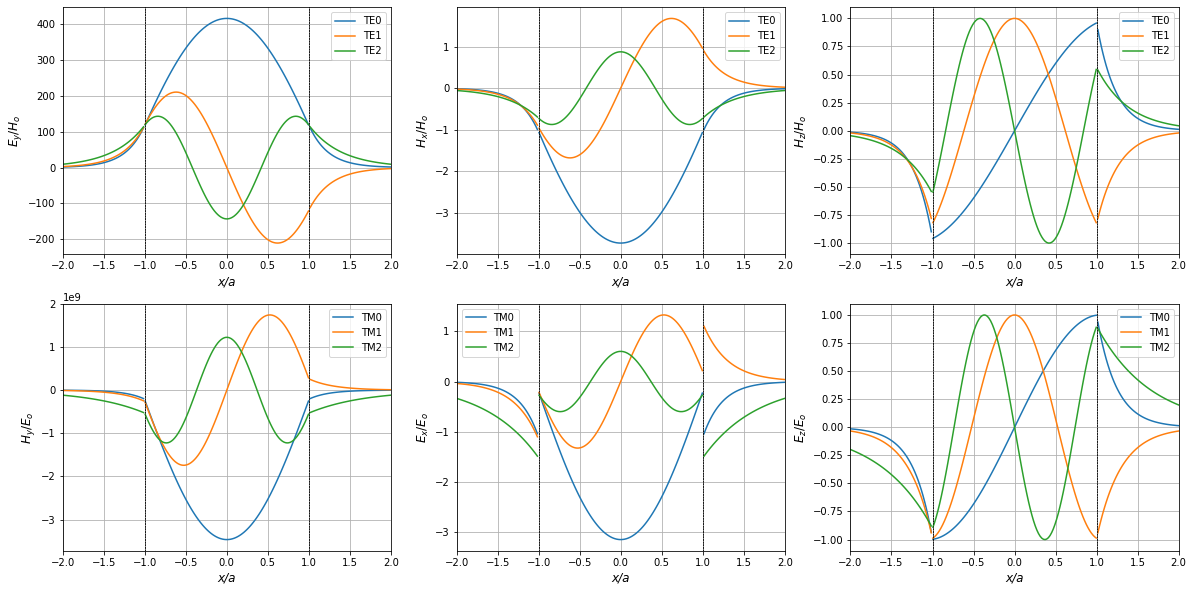

In [257]:
fig, axs = plt.subplots(2,3, figsize = (20, 10))

for i in range(len(modes)):
    
    p = modes[i][0][0:2]
    m = int(modes[i][0][2])
    
    neff = modes[i][1]
    β = k0*neff
    kf = k0*np.sqrt(nf**2 - neff**2)
    αc = k0*np.sqrt(neff**2 - nc**2)
    αs = k0*np.sqrt(neff**2 - ns**2) 
    
    if(p == "TE"):
        Φ = (m*pi + np.arctan(αc/kf) - np.arctan(αs/kf) ) / 2
        E_co, E_cl, E_sb, H_co, H_cl, H_sb = TE(β, ω, kf, αc, αs, Φ, x1, x2, x3)
        
        # Ey
        axs[0,0].plot(x1/a, np.imag(E_sb[1]), label = "TE"+str(m))
        axs[0,0].plot(x2/a, np.imag(E_co[1]), color = axs[0,0].lines[-1].get_color())
        axs[0,0].plot(x3/a, np.imag(E_cl[1]), color = axs[0,0].lines[-1].get_color())
        
        axs[0,0].axvline(-1, lw = 0.5, ls = '--', color = 'k'), axs[0,0].axvline(1, lw = 0.5, ls = '--', color = 'k')
        axs[0,0].set_xlabel("x/a", fontsize = 12, fontstyle = 'italic'), axs[0,0].set_ylabel(r"$E_y/H_o$", fontsize = 12, fontstyle = 'italic')
        axs[0,0].legend(), axs[0,0].grid(b=True)
        axs[0,0].set_xlim(-2,2)
        
        # Hx
        axs[0,1].plot(x1/a, np.imag(H_sb[0]), label = "TE"+str(m))
        axs[0,1].plot(x2/a, np.imag(H_co[0]), color = axs[0,1].lines[-1].get_color())
        axs[0,1].plot(x3/a, np.imag(H_cl[0]), color = axs[0,1].lines[-1].get_color())
        
        axs[0,1].axvline(-1, lw = 0.5, ls = '--', color = 'k'), axs[0,1].axvline(1, lw = 0.5, ls = '--', color = 'k')
        axs[0,1].set_xlabel("x/a", fontsize = 12, fontstyle = 'italic'), axs[0,1].set_ylabel(r"$H_x/H_o$", fontsize = 12, fontstyle = 'italic')
        axs[0,1].legend(), axs[0,1].grid(b=True)
        axs[0,1].set_xlim(-2,2)
        
        # Hz
        axs[0,2].plot(x1/a, np.real(H_sb[2]), label = "TE"+str(m))
        axs[0,2].plot(x2/a, np.real(H_co[2]), color = axs[0,2].lines[-1].get_color())
        axs[0,2].plot(x3/a, np.real(H_cl[2]), color = axs[0,2].lines[-1].get_color())
        
        axs[0,2].axvline(-1, lw = 0.5, ls = '--', color = 'k'), axs[0,2].axvline(1, lw = 0.5, ls = '--', color = 'k')
        axs[0,2].set_xlabel("x/a", fontsize = 12, fontstyle = 'italic'), axs[0,2].set_ylabel(r"$H_z/H_o$", fontsize = 12, fontstyle = 'italic')
        axs[0,2].legend(), axs[0,2].grid(b=True)
        axs[0,2].set_xlim(-2,2)
        
    else:
        Φ = (m*pi + np.arctan(pc*αc/kf) - np.arctan(ps*αs/kf) ) / 2
        E_co, E_cl, E_sb, H_co, H_cl, H_sb = TM(β, ω, kf, αc, αs, Φ, x1, x2, x3)
        
        # Hy
        axs[1,0].plot(x1/a, np.imag(H_sb[1]), label = "TM"+str(m))
        axs[1,0].plot(x2/a, np.imag(H_co[1]), color = axs[1,0].lines[-1].get_color())
        axs[1,0].plot(x3/a, np.imag(H_cl[1]), color = axs[1,0].lines[-1].get_color())
        
        axs[1,0].axvline(-1, lw = 0.5, ls = '--', color = 'k'), axs[1,0].axvline(1, lw = 0.5, ls = '--', color = 'k')
        axs[1,0].set_xlabel("x/a", fontsize = 12, fontstyle = 'italic'), axs[1,0].set_ylabel(r"$H_y/E_o$", fontsize = 12, fontstyle = 'italic')
        axs[1,0].legend(), axs[1,0].grid(b=True)
        axs[1,0].set_xlim(-2,2)
        
        # Ex
        axs[1,1].plot(x1/a, np.imag(E_sb[0]), label = "TM"+str(m))
        axs[1,1].plot(x2/a, np.imag(E_co[0]), color = axs[1,1].lines[-1].get_color())
        axs[1,1].plot(x3/a, np.imag(E_cl[0]), color = axs[1,1].lines[-1].get_color())
        
        axs[1,1].axvline(-1, lw = 0.5, ls = '--', color = 'k'), axs[1,1].axvline(1, lw = 0.5, ls = '--', color = 'k')
        axs[1,1].set_xlabel("x/a", fontsize = 12, fontstyle = 'italic'), axs[1,1].set_ylabel(r"$E_x/E_o$", fontsize = 12, fontstyle = 'italic')
        axs[1,1].legend(), axs[1,1].grid(b=True)
        axs[1,1].set_xlim(-2,2)
        
        # Ez
        axs[1,2].plot(x1/a, np.real(E_sb[2]), label = "TM"+str(m))
        axs[1,2].plot(x2/a, np.real(E_co[2]), color = axs[1,2].lines[-1].get_color())
        axs[1,2].plot(x3/a, np.real(E_cl[2]), color = axs[1,2].lines[-1].get_color())
        
        axs[1,2].axvline(-1, lw = 0.5, ls = '--', color = 'k'), axs[1,2].axvline(1, lw = 0.5, ls = '--', color = 'k')
        axs[1,2].set_xlabel("x/a", fontsize = 12, fontstyle = 'italic'), axs[1,2].set_ylabel(r"$E_z/E_o$", fontsize = 12, fontstyle = 'italic')
        axs[1,2].legend(), axs[1,2].grid(b=True)
        axs[1,2].set_xlim(-2,2)